<center>
    <h1 style="font-size: 32px;">Data Analysis and Visualization</h1>
    <h2>Abdulrahman Mohammed Alobaidy</h2>
    <h3>Cohort 9</h3>
    <h3>Data Analyst Nanodegree Program</h3>
    <h4>Email: <a href="mailto:AbdulrahmanAlobaidy2001@gmail.com">AbdulrahmanAlobaidy2001@gmail.com</a></h4>
</center>
<hr>

# About the Dataset
---

This data set contains information about the **Ford Go** bike-sharing system, the dataset contains data points a little more than 180,000 data points for the month of February of the year 2019.

## Dataset Features

The dataset consists of the following 16 features:
* `duration_sec`: Duration of the trip.
* `start_time`: Timestamp of the start of the trip.
* `end_time`: Timestamp of the start of the trip.
* `start_station_id`: ID of the start station.
* `start_station_name`: Name of the start station.
* `start_station_latitude`, `start_station_longitude`: Coordinates  of the start station.
* `end_station_id`: ID of the end station.
* `end_station_name`: Name of the end station.
* `end_station_latitude`, `end_station_longitude`: Coordinates  of the end station.
* `bike_id`: ID of the bike used.
* `user_type`: Type of user, Subscriber or Customer.
* `member_birth_year`: Year of birth of user.
* `member_gender`: Gender of the user.
* `bike_share_for_all_trip`: Whether the bike was part of the **Bike Share For All** program.

The cleaned version of the dataset contains these 6 additional engineered features:
* `duration_hour`: `duration_sec` converted to hour-format.
* `duration_min`: `duration_sec` converted to minute-format.
* `hour-of-day`: Extracted from `start_time`.
* `user_age`: Extracted from the `member_birth_year` column, i.e. current year minus the year in the `member_birht_year`.
* `age_range`: `user_age` categorized into age bins of 10 using this format [start, end).
* `route`: Route of trip, (`start_station_name` -> `end_station_name`).

# Features of Interest

The following is a list of the features of interest, i.e. the features that we will be focusing on and analyzing, along with extracted and enigneered ones which are present in the cleaned dataset, classified into either **Quantitative** or **Qualitative**:
1. **Quantitative**:
    * `duration_min`
    * `hour_of_day`
    * `user_age`
2. **Qualitative**:
    * `start_station_name`
    * `end_station_name`
    * `route`
    * `user_type`
    * `age_range`
    * `member_gender`
    * `bike_share_for_all_trip`

During the following analysis we aim to discover patterns formed by the data points and relationships between the aforementioned features that will help us answer any questions that we might have.

# Contents
---

1. [Setting Up Libraries](#Setting-Up-Libraries)


2. [Data Wrangling](#Data-Wrangling)

    a. [Data Gathering](#Data-Gathering)

    b. [Data Assessment](#Data-Assessment)

    c. [Data Cleaning](#Data-Cleaning)


3. [Data Analysis](#Data-Analysis)

    a. [Univariate Analysis](#Univariate-Analysis)

    b. [Bivariate Analysis](#Bivariate-Analysis)

    c. [Multivariate Analysis](#Multivariate-Analysis)

# Setting Up Libraries
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Data Wrangling
---

## Data Gathering

In [343]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [323]:
df.shape

(183412, 16)

## Data Assessment

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

1. `duration_sec` should be trasformed into hour-format.
2. `start_time` and `end_time` should be of datatype `datetime` instead of `object`.
3. `member_birth_year` should be of datatype `int64` instead of `float64`, it would be better if we had a column that specifies the age of the user based on the current year and the user's birth year.

In [229]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [230]:
df[df['start_station_name'].isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176154,1447,2019-02-02 12:03:04.5440,2019-02-02 12:27:12.2670,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984.0,Male,No
179730,309,2019-02-01 12:59:45.9690,2019-02-01 13:04:55.4260,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987.0,Female,No
179970,659,2019-02-01 12:17:37.6750,2019-02-01 12:28:37.0140,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999.0,Female,No
180106,2013,2019-02-01 11:33:55.1470,2019-02-01 12:07:28.9400,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No


There is an equal number of unidentified stations in the dataset, we'll try to investigate this and maybe recover the data from other records with the same information that the missing records have.

In [231]:
df[(df['start_station_latitude'] == 37.39) & (~df['start_station_name'].isna())]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


There appears to be no matching records, these are probably test records looking at the coordinates of the stations, the best option we have is to remove them.

In [232]:
df[df['member_birth_year'].isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290230,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.6630,2019-02-01 01:42:36.8780,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.3660,2019-02-01 01:39:05.9500,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.4200,2019-02-01 01:23:37.6450,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.6410,2019-02-01 01:11:54.9490,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


Same here goes with the `member_birth_year` and `user_gender`, let's investigate the values the same way.

In [233]:
df['member_birth_year'].isna().sum()

8265

There are a lot of data points where both columns are empty, in this case, the best option is to remove these rows from the dataset, after that we'll still have a lot of data points to work with.

In [234]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

`user_type` should be of datatype `category` instead of `object`.

In [235]:
df['member_birth_year'].min()

1878.0

In [236]:
df['member_birth_year'].sort_values()

27370     1878.0
72711     1900.0
41319     1900.0
173711    1900.0
94616     1900.0
           ...  
183354       NaN
183356       NaN
183363       NaN
183371       NaN
183402       NaN
Name: member_birth_year, Length: 183412, dtype: float64

Here we can clearly see some outliers in this variable, this must be restricited to a more plausable number.

In [237]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

`member_gender` should be of datatype `category` instead of `object`.

In [238]:
df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

`bike_share_for_all_trip` should be of datatype `category` instead of `object`.

In [239]:
df.start_station_name.value_counts().count()

329

In [240]:
df.end_station_name.value_counts().count()

329

We notice that there are only a few of stations compared to the number of records that we have, so it is better to convert the `start_station_name` and `end_station_name` columns to datatype `category` instead of `object`.

### Assessment Results

1. `duration_sec` should be trasformed into hour-format.
2. `start_time` and `end_time` should be of datatype `datetime` instead of `object`.
3. Remove records with unidentified station names and ID's.
4. `user_type` should be of datatype `category` instead of `object`.
5. Remove the records with `NaN`s in both `member_birth_year` and `member_gender`.
6. `member_birth_year` should be of datatype `int64` instead of `float64`.
7. It would be better if we had a column that specifies the age of the user based on the current year and the user's birth year.
8. There are some outliers in the `member_birth_year`.
9. `member_gender` should be of datatype `category` instead of `object`.
10. `bike_share_for_all_trip` should be of datatype `category` instead of `object`.
11. We notice that there are only a few of stations compared to the number of records that we have, so it is better to convert the `start_station_name` and `end_station_name` columns to datatype `category` instead of `object`.
12. A nice thing to have would be a column that contains the route, i.e. the `start_station_name`  and the `end_station_name` joined in a single column.

## Data Cleaning

In [347]:
df_copy = df.copy()

**Define**

Change `duration_sec` column into hour-format, then change the column's datatype into `float64`.

**Code**

In [348]:
df_copy['duration_hour'] = round(df_copy['duration_sec'] / 3600, 2)

**Test**

In [349]:
df_copy['duration_hour'].head()

0    14.50
1    11.81
2    17.18
3    10.14
4     0.44
Name: duration_hour, dtype: float64

**Define**

Remove outliers from the `duration_hour` column, which are the ones with more than one hour in length, then create a new column, `duration_min`, to store the same information but in minute-format.

**Code**

In [350]:
df_copy['duration_hour'].describe()

count    183412.000000
mean          0.201696
std           0.498456
min           0.020000
25%           0.090000
50%           0.140000
75%           0.220000
max          23.730000
Name: duration_hour, dtype: float64

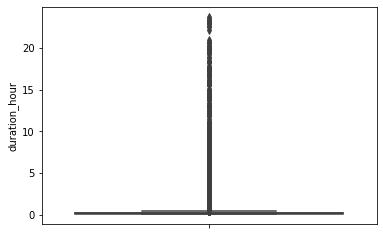

In [351]:
sb.boxplot(data = df_copy, y = 'duration_hour');

In [352]:
np.percentile(df_copy['duration_hour'], 99.1)

1.02

Here we can see that more than 99% of the data points that we have are below the one-hour mark.

In [353]:
df_copy = df_copy[df_copy['duration_hour'] <= 1]

In [354]:
df_copy['duration_min'] = df_copy['duration_hour'] * 60

**Test**

In [355]:
assert (df_copy['duration_hour'] > 1).sum() == 0

In [356]:
df_copy['duration_min'].head()

4    26.4
5    30.0
6    19.2
7    27.0
8    26.4
Name: duration_min, dtype: float64

**Define**

Change `start_time` and `end_time`'s datatypes into `datetime`.

**Code**

In [357]:
df_copy['start_time'] = pd.to_datetime(df_copy['start_time'])
df_copy['end_time'] = pd.to_datetime(df_copy['end_time'])

**Test**

In [358]:
df_copy[['start_time', 'end_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181723 entries, 4 to 183411
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   start_time  181723 non-null  datetime64[ns]
 1   end_time    181723 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 4.2 MB


**Define**

Extract hour of day from the `start_time` column and store it in a new column named `hour_of_day`.

**Code**

In [359]:
df_copy['hour_of_day'] = df_copy['start_time'].dt.hour

**Test**

In [360]:
df_copy['hour_of_day'].head()

4    23
5    23
6    23
7    23
8    23
Name: hour_of_day, dtype: int64

**Define**

Remove records with missing `start_station_id` and `end_station_id`.

**Code**

In [361]:
nan_records = df_copy[df_copy['start_station_name'].isna()]

df_copy.drop(nan_records.index, inplace = True)

**Test**

In [362]:
df_copy.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          7945
member_gender              7945
bike_share_for_all_trip       0
duration_hour                 0
duration_min                  0
hour_of_day                   0
dtype: int64

**Define**

Remove records with missing `member_birth_year` and `user_gender` data.

**Code**

In [363]:
nan_records = df_copy[df_copy['member_birth_year'].isna()]

df_copy.drop(nan_records.index, inplace = True)

**Test**

In [364]:
df_copy.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
duration_hour              0
duration_min               0
hour_of_day                0
dtype: int64

**Define**

Change `member_birth_year`'s datatype to `int` instead of `float`, then create a new column .

**Code**

In [365]:
df_copy['member_birth_year'] = df_copy['member_birth_year'].astype(int)

**Test**

In [366]:
df_copy['member_birth_year'].dtype

dtype('int32')

**Define**

Create a new column, `user_age`, and fill it with the current year minus the values from `member_birth_year`.

**Code**

In [367]:
import datetime as dt

now = dt.datetime.now()

df_copy['user_age'] = now.year - df_copy['member_birth_year']

**Test**

In [368]:
df_copy.user_age.head()

4    46
5    61
6    37
7    31
8    32
Name: user_age, dtype: int32

**Define**

Remove records where `user_age` is more than 100 years old.

**Code**

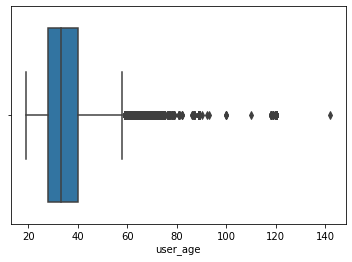

In [369]:
sb.boxplot(data = df_copy, x = 'user_age');

In [370]:
invalid_ages = df_copy[df_copy['user_age'] > 100]

df_copy.drop(invalid_ages.index, inplace = True)

**Test**

In [371]:
assert (df_copy['user_age'] > 100).sum() == 0

**Define**

Create a new column, `age_range`, that categorizes the `user_age` variable in range bins of 10.

**Code**

In [372]:
# the size of the age class
steps = 10
# creating a numpy array with the desired ranges and appending the 200 at the end in order to include the remaining of the ages
age_ranges = np.append(np.arange(0, 100, steps), 200)
# create a list to store the corresponding labels of the age classes
age_ranges_labels = list()
# loop over the age ranges
for i in range(age_ranges.shape[0]):
    # append the current number with the next number with a hyphen separating them, then append it to the labels list
    age_ranges_labels.append(str(age_ranges[i]) + '-' + str(age_ranges[i + 1]))
    # if the only range that is left is the x+ range, then append that to the labels list and break
    if i == age_ranges.shape[0] - 3:
        age_ranges_labels.append(str(age_ranges[i + 1]) + '+')
        break
age_ranges, age_ranges_labels

(array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 200]),
 ['0-10',
  '10-20',
  '20-30',
  '30-40',
  '40-50',
  '50-60',
  '60-70',
  '70-80',
  '80-90',
  '90+'])

In [373]:
df_copy['age_range'] = pd.cut(df_copy['user_age'], age_ranges, labels=age_ranges_labels)

**Test**

In [277]:
df_copy['age_range'].head()

4    40-50
5    60-70
6    30-40
7    30-40
8    30-40
Name: age_range, dtype: category
Categories (10, object): ['0-10' < '10-20' < '20-30' < '30-40' ... '60-70' < '70-80' < '80-90' < '90+']

**Define**

Change `user_type`'s datatype from `object` to `category`.

**Code**

In [278]:
df_copy['user_type'] = df_copy['user_type'].astype('category')

**Test**

In [279]:
df_copy['user_type'].dtype

CategoricalDtype(categories=['Customer', 'Subscriber'], ordered=False)

**Define**

Change `member_gender`'s datatype from `category` to `object`.

**Code**

In [280]:
cats = pd.api.types.CategoricalDtype(ordered = True, categories = ['Male', 'Female', 'Other'])

df_copy['member_gender'] = df_copy['member_gender'].astype(cats)

**Test**

In [281]:
df_copy['member_gender'].dtype

CategoricalDtype(categories=['Male', 'Female', 'Other'], ordered=True)

**Define**

Change `bike_share_for_all_trip`'s datatype from `object` to `category`.

**Code**

In [282]:
cats = pd.api.types.CategoricalDtype(ordered = True, categories = ['Yes', 'No'])

df_copy['bike_share_for_all_trip'] = df_copy['bike_share_for_all_trip'].astype(cats)

**Test**

In [283]:
df_copy['bike_share_for_all_trip'].dtype

CategoricalDtype(categories=['Yes', 'No'], ordered=True)

**Define**

Convert `start_station_name` and `end_station_name`'s datatypes from `object` to `category`.

**Code**

In [284]:
df_copy['start_station_name'] = df_copy['start_station_name'].astype('category')
df_copy['end_station_name'] = df_copy['end_station_name'].astype('category')

**Test**

In [285]:
df_copy[['start_station_name', 'end_station_name']].dtypes

start_station_name    category
end_station_name      category
dtype: object

**Define**

Join the `start_station_name` and the `end_station_name` and store the resulting string in a new column named `route`.

**Code**

In [286]:
df_copy['route'] = df_copy['start_station_name'].astype(str) + '->' + df_copy['end_station_name'].astype(str)

**Test**

In [287]:
df_copy['route'].head()

4           Frank H Ogawa Plaza->10th Ave at E 15th St
5     4th St at Mission Bay Blvd S->Broadway at Kearny
6       Palm St at Willow St->San Jose Diridon Station
7    Washington St at Kearny St->Valencia St at 21s...
8    Washington St at Kearny St->Valencia St at 21s...
Name: route, dtype: object

Finally, export the cleaned dataset to `csv` file.

In [288]:
df_copy.to_csv('clean.csv', index = False)

# Data Analysis
---

In [375]:
df = pd.read_csv('clean.csv')

In [376]:
df.shape

(173513, 22)

In [377]:
df['start_time'].min(), df['start_time'].max()

('2019-02-01 00:00:20.636', '2019-02-28 23:59:18.548')

In [378]:
df = df[['duration_min', 'hour_of_day', 'start_station_name', 'end_station_name', 'route', 'bike_id', 'user_type', 'user_age', 'age_range',
         'member_gender', 'bike_share_for_all_trip']]

In [379]:
df.head()

,duration_min,hour_of_day,start_station_name,end_station_name,route,bike_id,user_type,user_age,age_range,member_gender,bike_share_for_all_trip
0,26.4,23,Frank H Ogawa Plaza,10th Ave at E 15th St,Frank H Ogawa Plaza->10th Ave at E 15th St,4898,Subscriber,46,40-50,Male,Yes
1,30.0,23,4th St at Mission Bay Blvd S,Broadway at Kearny,4th St at Mission Bay Blvd S->Broadway at Kearny,5200,Subscriber,61,60-70,Male,No
2,19.2,23,Palm St at Willow St,San Jose Diridon Station,Palm St at Willow St->San Jose Diridon Station,3803,Subscriber,37,30-40,Female,No
3,27.0,23,Washington St at Kearny St,Valencia St at 21st St,Washington St at Kearny St->Valencia St at 21s...,6329,Subscriber,31,30-40,Male,No
4,26.4,23,Washington St at Kearny St,Valencia St at 21st St,Washington St at Kearny St->Valencia St at 21s...,6548,Subscriber,32,30-40,Other,No


## Univariate Analysis
---

Here we aim to uncover the patterns that are present in the distribution of the variables.

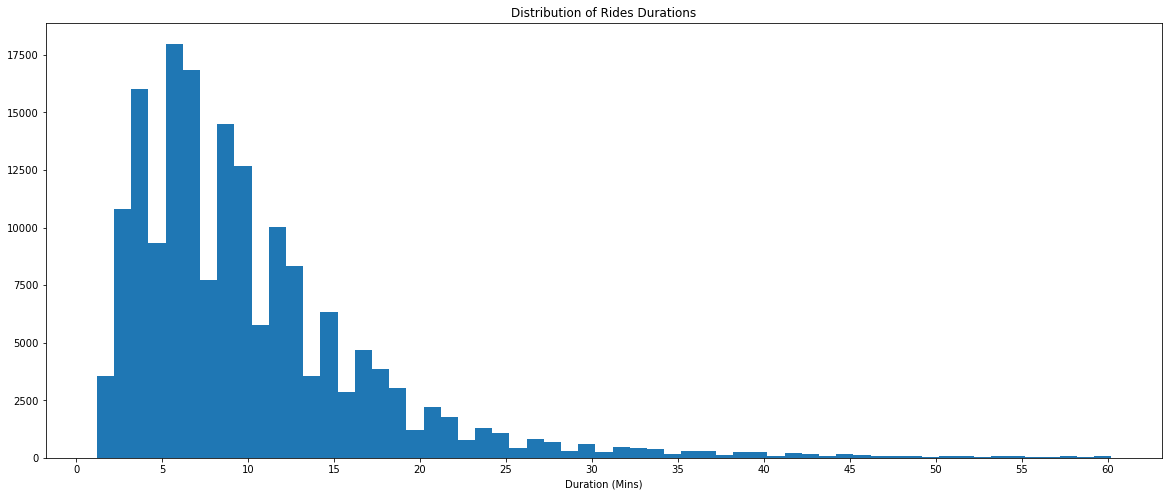

In [380]:
bins = np.arange(df['duration_min'].min(), df['duration_min'].max() + 1, 1)

plt.figure(figsize = (20, 8))

plt.hist(data = df, x = 'duration_min', bins = bins)

ticks = [x for x in range(0, 65, 5)]

plt.xticks(ticks, ticks)

plt.title('Distribution of Rides Durations')
plt.xlabel('Duration (Mins)');

Here we notice that the bulk of the time spent was in the 5 to 10-minute range, with the distribution continuously decreasing as the time spent using the bike gets longer.

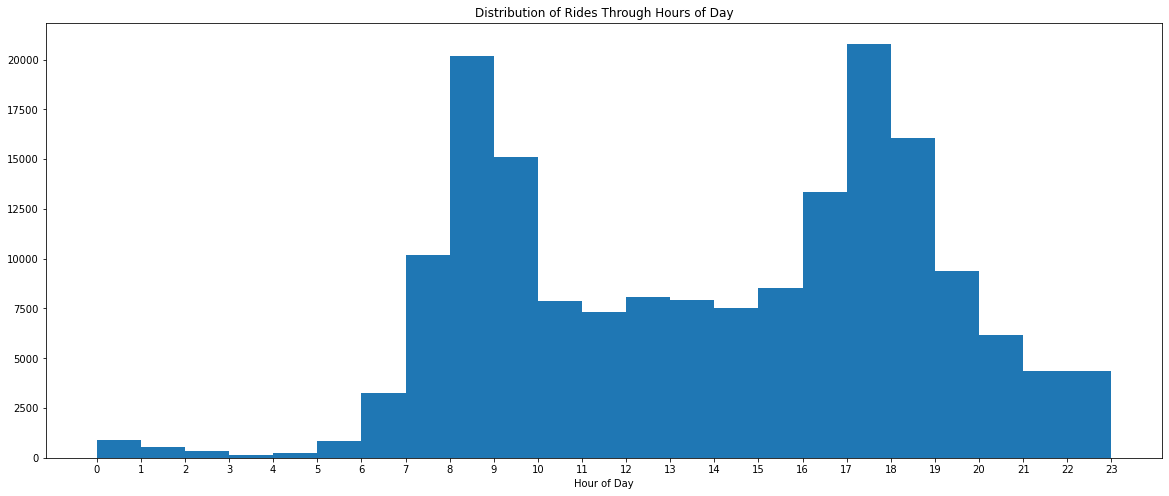

In [299]:
bins = np.arange(0, 24, 1)

plt.figure(figsize = (20, 8))

plt.hist(data = df, x = 'hour_of_day', bins = bins)

ticks = [i for i in range(24)]

plt.title('Distribution of Rides Through Hours of Day')
plt.xlabel('Hour of Day')
plt.xticks(ticks, ticks);

From this plot, we notice that the heighest usage hour was in the 8 o'clock in the morning as well as the 5 o'clock in the afternoon, which suggests that probably most of the users are using the service to commute to work.

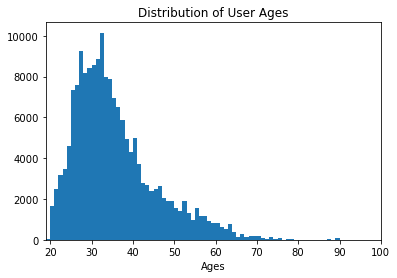

In [92]:
bins = np.arange(0, df['user_age'].max() + 1, 1)

plt.hist(data = df, x = 'user_age', bins = bins)

plt.xlim((df['user_age'].min(), 100))

plt.title('Distribution of User Ages')
plt.xlabel('Ages');

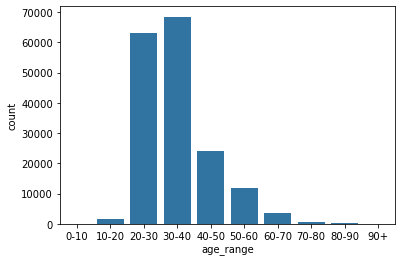

In [340]:
base_color = sb.color_palette()[0]

sb.countplot(data = df, x = 'age_range', order = age_ranges_labels, color = base_color);

From the two previous plots we notice that the bulk of our users are in the age range of 20 to 40 years of age.

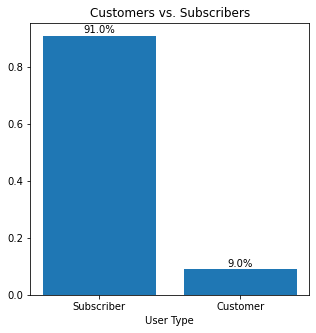

In [76]:
type_count = df['user_type'].value_counts()

type_props = round(type_count / df.shape[0], 2)


plt.figure(figsize = (5, 5))

plt.bar(np.arange(0, len(type_count)), type_props)


for i in range(len(type_props)):

    plt.text(i, type_props[i] + 0.01, str(type_props[i]*100) + '%', ha = 'center')


plt.title('Customers vs. Subscribers')
plt.xlabel('User Type')
plt.xticks(np.arange(0, len(type_count)), type_count.index);

**91%** of the users are **Subscribers** and **9%** are **Customers**.

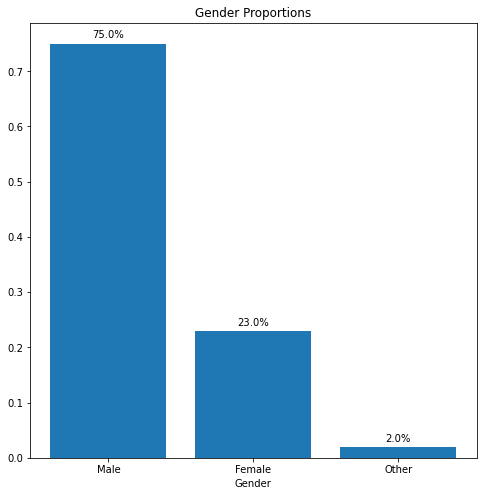

In [77]:
gender_count = df['member_gender'].value_counts()

gender_props = round(gender_count / df.shape[0], 2)

plt.figure(figsize = (8, 8))

plt.bar(np.arange(0, len(gender_count)), gender_props)

for i in range(len(gender_props)):

    plt.text(i, gender_props[i] + 0.01, str(gender_props[i]*100) + '%', ha = 'center')


plt.title('Gender Proportions')
plt.xlabel('Gender')
plt.xticks(np.arange(0, len(gender_count)), gender_count.index);

Males constitute three quarters of the dataset, while females constitute 23% and 2% for **Others**.

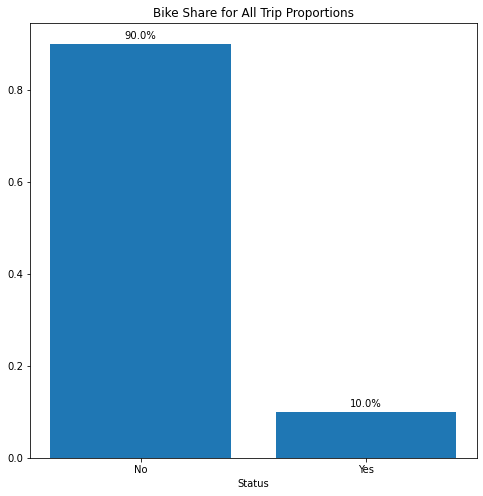

In [78]:
bike_share_count = df['bike_share_for_all_trip'].value_counts()

bike_share_props = round(bike_share_count / df.shape[0], 2)

plt.figure(figsize = (8, 8))



plt.bar(np.arange(0, len(bike_share_count)), bike_share_props)

for i in range(len(bike_share_props)):

    plt.text(i, bike_share_props[i] + 0.01, str(bike_share_props[i]*100) + '%', ha = 'center')


plt.title('Bike Share for All Trip Proportions')
plt.xlabel('Status')
plt.xticks(np.arange(0, len(bike_share_count)), bike_share_count.index);

The plot shows that **90%** of the bikes are **not** part of a bike sharing program, while **10%** are.

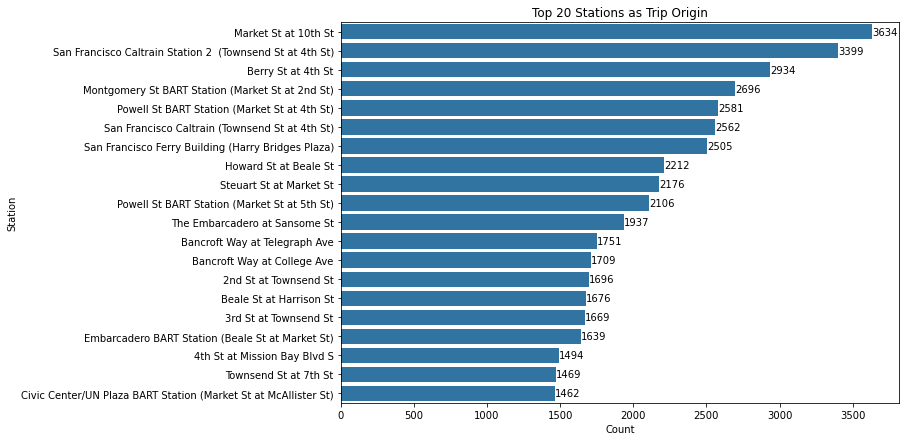

In [307]:
most_used_start_stations = df['start_station_name'].value_counts()[0:20]

base_color = sb.color_palette()[0]

plt.figure(figsize = (10, 7))

sb.barplot(data = df, y = most_used_start_stations.index, x = most_used_start_stations, color = base_color)

for i in range(len(most_used_start_stations)):
    plt.text(most_used_start_stations[i], i, str(most_used_start_stations[i]), va = 'center')

plt.title('Top 20 Stations as Trip Origin')
plt.ylabel('Station')
plt.xlabel('Count');

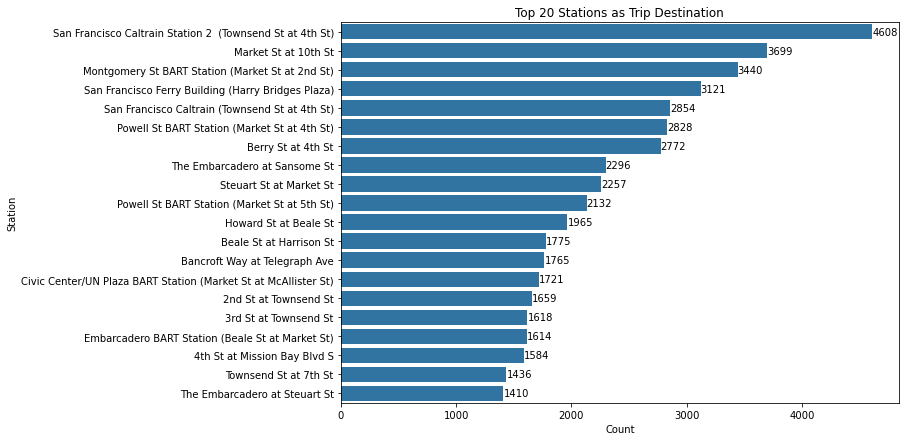

In [306]:
most_used_end_stations = df['end_station_name'].value_counts()[0:20]

base_color = sb.color_palette()[0]

plt.figure(figsize = (10, 7))

sb.barplot(data = df, y = most_used_end_stations.index, x = most_used_end_stations, color = base_color)

for i in range(len(most_used_end_stations)):
    plt.text(most_used_end_stations[i], i, str(most_used_end_stations[i]), va = 'center')

plt.title('Top 20 Stations as Trip Destination')
plt.ylabel('Station')
plt.xlabel('Count');

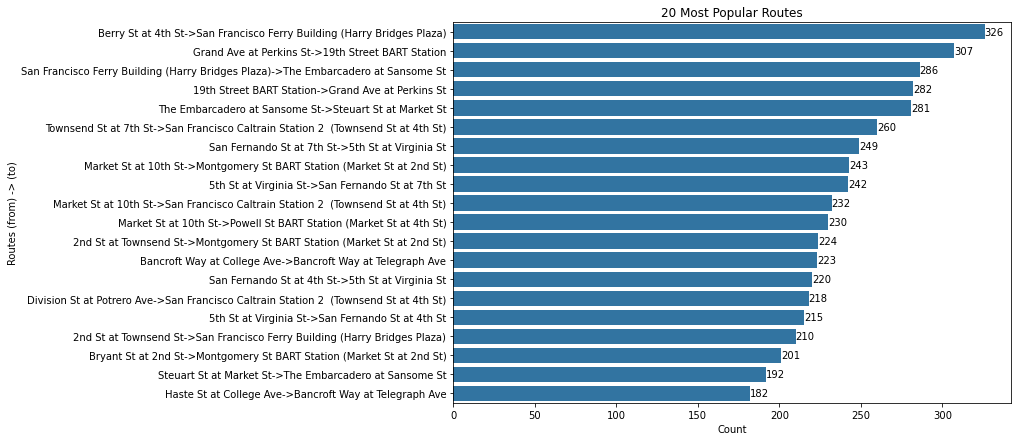

In [219]:
most_used_routes = df['route'].value_counts()[0:20]

base_color = sb.color_palette()[0]

plt.figure(figsize = (10, 7))

sb.barplot(data = df, y = most_used_routes.index, x = most_used_routes, color = base_color)

for i in range(len(most_used_routes)):
    plt.text(most_used_routes[i], i, str(most_used_routes[i]), va = 'center')

plt.title('20 Most Popular Routes')
plt.ylabel('Routes (from) -> (to)')
plt.xlabel('Count');

In [342]:
100 * most_used_start_stations.sum() / df.shape[0]

24.95893679436123

In [341]:
100 * most_used_end_stations.sum() / df.shape[0]

26.830266320102815

In [220]:
100 * most_used_routes.sum() / df.shape[0]

2.779618818186534

The previous three plots showed the 20 most used stations as a trip origin, destinatin, and 20 most popular routes respectively.

The 20 most used start stations make up about **25%** of the total trips count.

The 20 most used end stations make up about **27%** of the total trips count.

The 20 most used routes make up about **3%** of the total trips count.

## Bivariate Analysis
---

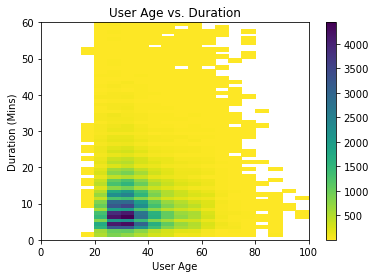

In [85]:
bins_x = np.arange(0, df['user_age'].max() + 5, 5)
bins_y = np.arange(0, df['duration_min'].max() + 1, 1)

plt.hist2d(data = df, x = 'user_age', y = 'duration_min', cmin = 0.5, cmap = 'viridis_r', bins = [bins_x, bins_y])

plt.title('User Age vs. Duration')
plt.xlabel('User Age')
plt.ylabel('Duration (Mins)')
plt.colorbar();

From the previous heatmap we notice that most of the data points are concentrated in the duration of 5 to 15 minutes for users within age range of 20 to 40 years old.

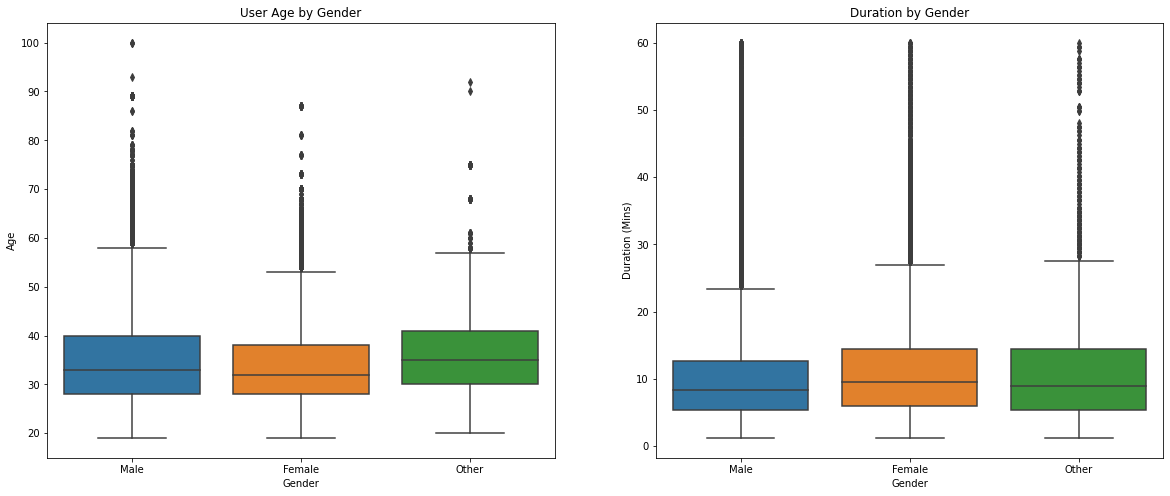

In [91]:

plt.figure(figsize = (20, 8))

plt.subplot(1,2,1)
sb.boxplot(data = df, x = 'member_gender', y = 'user_age')
plt.title('User Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')


plt.subplot(1,2,2)
sb.boxplot(data = df, x = 'member_gender', y = 'duration_min')
plt.title('Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Duration (Mins)');

For the two previous box plots, the first one suggest that males have a higher median than females when it comes to user ages, but not by too much, as for the second one, it suggest that females have a higher median than males when it comes to ride duration, again, by not much.

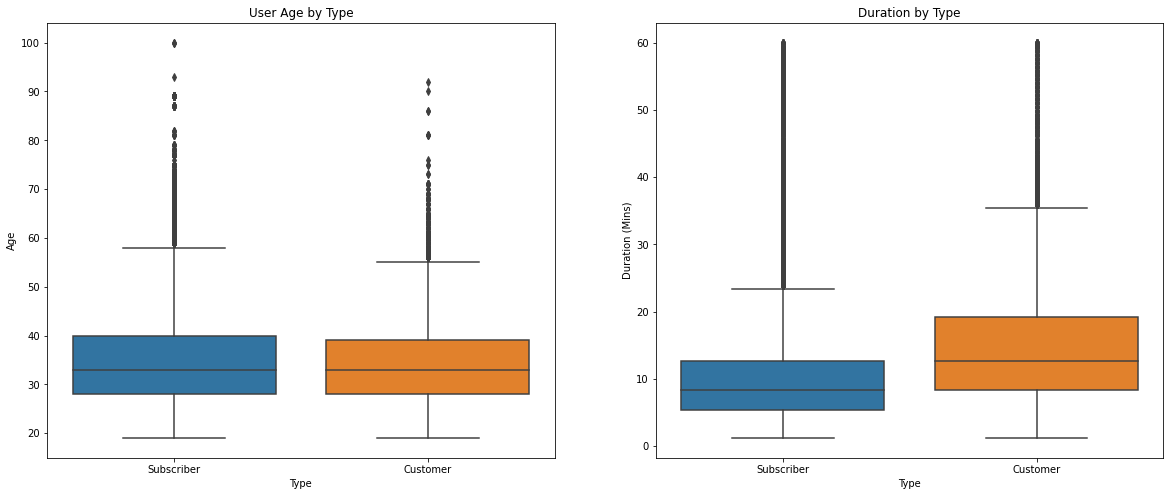

In [94]:

plt.figure(figsize = (20, 8))

plt.subplot(1,2,1)
sb.boxplot(data = df, x = 'user_type', y = 'user_age')
plt.title('User Age by Type')
plt.xlabel('Type')
plt.ylabel('Age')


plt.subplot(1,2,2)
sb.boxplot(data = df, x = 'user_type', y = 'duration_min')
plt.title('Duration by Type')
plt.xlabel('Type')
plt.ylabel('Duration (Mins)');

The previous box plots show that users of both types, Subscribers and Customers, both have about the same median when it comes to age, but customers have a higher median when it comes to duration.

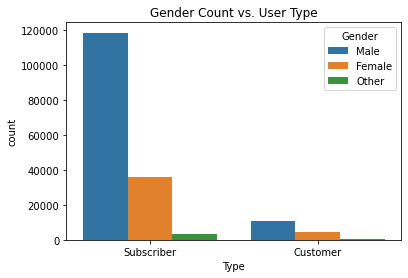

In [99]:
sb.countplot(data = df, hue = 'member_gender', x = 'user_type')
plt.title('Gender Count vs. User Type')
plt.xlabel('Type')
plt.legend(title = 'Gender');

Gender count for subscribers is obviously higher for all genders than for customers, which makes sense since **91%** of users are Subscribers.

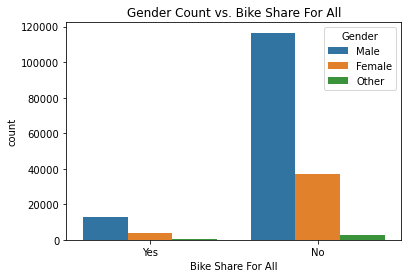

In [158]:
sb.countplot(data = df, hue = 'member_gender', x = 'bike_share_for_all_trip')
plt.title('Gender Count vs. Bike Share For All')
plt.xlabel('Bike Share For All')
plt.legend(title = 'Gender');

Same goes for this plot showing gender count amongst bikes that are part of a bike-sharing program versus those that aren't, the majority of the gender count goes to the **No** criteria, this makes sense since **90%** of the bikes are not enrolled in such program.

## Multivariate Analysis
---

Here we aim to see relationships between multiple variables.

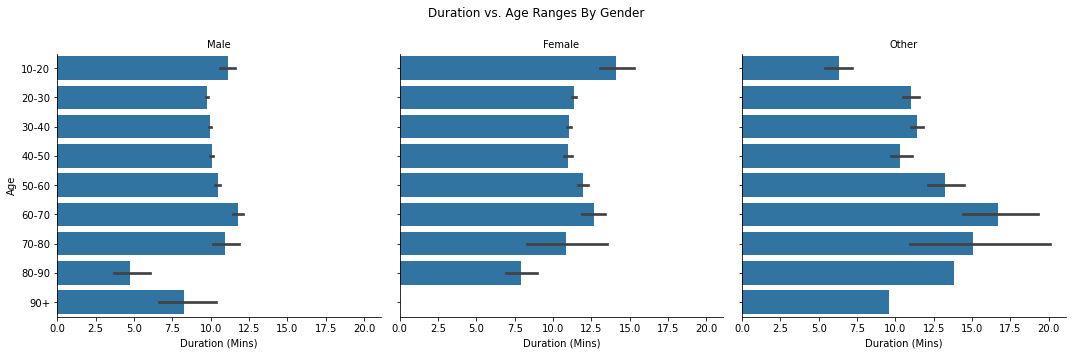

In [212]:
g = sb.FacetGrid(data = df, col = 'member_gender', height = 5, margin_titles = True)
g.map(sb.barplot, 'duration_min', 'age_range', order = age_ranges_labels[1:])

[g.axes.flat[i].set_xlabel('Duration (Mins)') for i  in range(len(g.axes.flat))]

g.axes.flat[0].set_ylabel('Age')

[plt.setp(ax.texts, text="") for ax in g.axes.flat]

g.set_titles(row_template = '{row_name}', col_template = '{col_name}')

plt.subplots_adjust(top=0.85)
g.fig.suptitle('Duration vs. Age Ranges By Gender');

The highest average duration taken by a male age group was that of age range 60-70 with 12 minutes, followed by 10-20 and 70-80 years with about 11 minutes.

As for females, the age group with the highest duration was the group with age range 10-20 with an average duration of about 15 minutes, followed by the 60-70 age group with a duration of about 12 minutes, with no female datapoints for ages greater than 90.

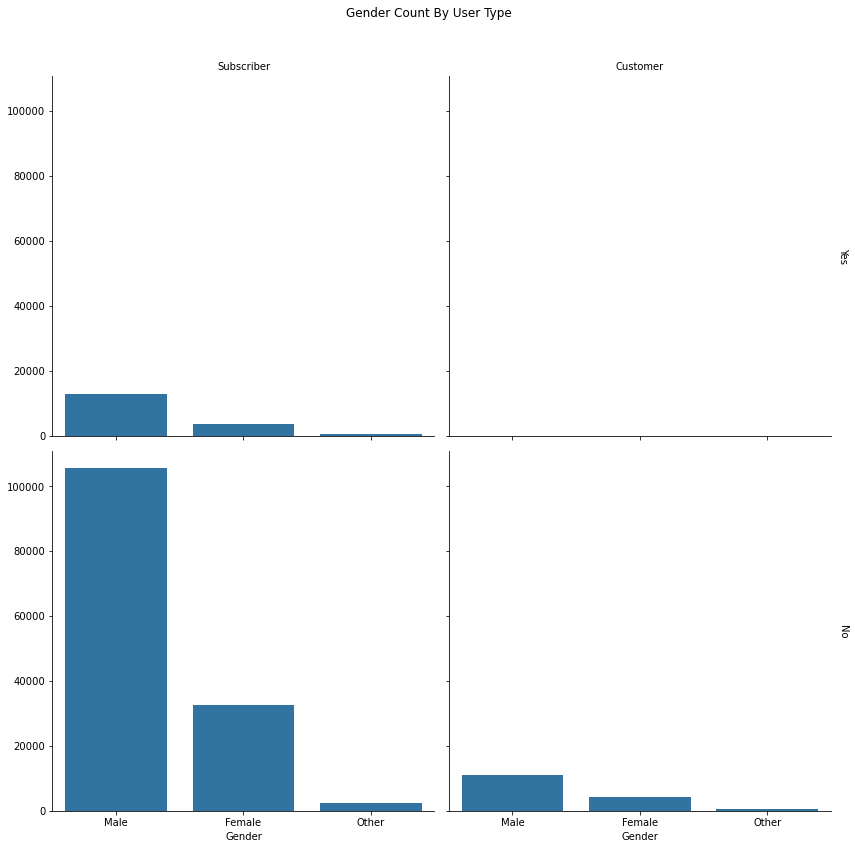

In [211]:
g = sb.FacetGrid(data = df, col = 'user_type', row = 'bike_share_for_all_trip', margin_titles = True, height = 6)
g.map(sb.countplot, 'member_gender', order = ['Male', 'Female', 'Other'])


[plt.setp(ax.texts, text="") for ax in g.axes.flat]

[g.axes[1][i].set_xlabel('Gender') for i  in range(len(g.axes[0]))]


g.set_titles(row_template = '{row_name}', col_template = '{col_name}')


plt.subplots_adjust(top=0.9)
g.fig.suptitle('Gender Count By User Type');

This multivariate plot shows the distribution of users' genders among user types and bike share program, there are no users of type customers with bike-share programs.

Gender count was almost the same with users that are subscribers using bikes that are part of bike-sharing program and users that are customers using bikes that are not a part of bike-sharing program.

The bulk of the gender counts where users that are subscribers and not using a bike-sharing program bike.

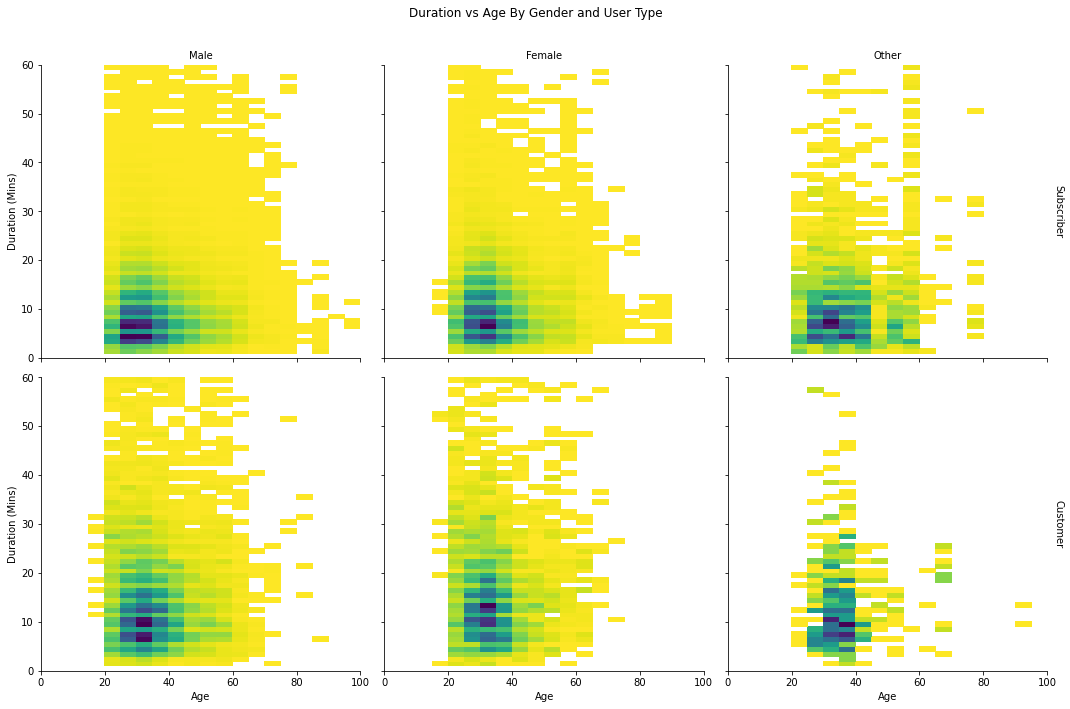

In [210]:
g = sb.FacetGrid(data = df, col = 'member_gender', row = 'user_type', margin_titles = True, height = 5)

bins_x = np.arange(0, df['user_age'].max() + 5, 5)
bins_y = np.arange(0, df['duration_min'].max() + 1, 1)

def plotGrid(x, y, **kwargs):
    plt.hist2d(x, y, cmin = 0.5, cmap = 'viridis_r', bins = [bins_x, bins_y])


g.map(plotGrid, 'user_age', 'duration_min')

[plt.setp(ax.texts, text="") for ax in g.axes.flat]

[g.axes[1][i].set_xlabel('Age') for i  in range(len(g.axes[0]))]
[g.axes[i][0].set_ylabel('Duration (Mins)') for i  in range(len(g.axes))]

g.set_titles(row_template = '{row_name}', col_template = '{col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Duration vs Age By Gender and User Type');

This plot shows a heatmap of age against duration of trip subsetted by user type and gender.

We notice that the data is concentrated in about the same place, but with small shifts for the center, for example, we notice that duration for females who are customers is higher than for females .who are subscribers, we also notice that males who are subscribers take the age range of about 25 to 35 years, while those who are customers take the age range of 30 to 35 years.

# Resources
---

All of the code and datasets for this project are included on a [Github Repository](https://github.com/AbdulrahmanAlobaidy/DAND-project-5) dedicated for this project, including this Notebook in its `ipynb` and HTML format as well as any other relevant files.